### Importação dos dados



In [25]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url) #Renomei o arquivo loja para Loja1
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [26]:
loja1.info()
loja1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


,Preço,Frete,Avaliação da compra,Quantidade de parcelas,lat,lon
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,650.491361,34.691805,3.976685,2.943196,-20.763366,-47.349385
std,819.582778,43.814183,1.415370,2.819897,5.372400,4.183180
min,10.070000,0.000000,1.000000,1.000000,-30.170000,-70.550000
25%,74.345000,4.141783,3.000000,1.000000,-22.250000,-48.790000
50%,313.750000,16.498835,5.000000,1.000000,-22.190000,-48.790000
75%,904.130000,48.050074,5.000000,4.000000,-18.100000,-44.380000
max,3969.380000,214.377060,5.000000,24.000000,1.410000,-36.590000


In [27]:
loja1.columns

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')

In [28]:

def calc_faturamento(loja):
  return float(loja['Preço'].sum())

Faturamento_por_lojas = {'LOJA 01':calc_faturamento(loja1),
                        'LOJA 02':calc_faturamento(loja2),
                        'LOJA 03':calc_faturamento(loja3),
                        'LOJA 04':calc_faturamento(loja4)}
print("--------------------------")
print("{:<10} | {:>12}".format("Loja", "Faturamento"))
print("--------------------------")
for loja, faturamento in Faturamento_por_lojas.items():
    print("{:<10} | R${:>11.2f}".format(loja, faturamento))
print("--------------------------")


--------------------------
Loja       |  Faturamento
--------------------------
LOJA 01    | R$ 1534509.12
LOJA 02    | R$ 1488459.06
LOJA 03    | R$ 1464025.03
LOJA 04    | R$ 1384497.58
--------------------------


In [29]:
fig = px.pie(
    names=list(Faturamento_por_lojas.keys()),
    values=list(Faturamento_por_lojas.values()),
    title='Faturamento por Loja',
    hole=0.4,
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_traces(textinfo='percent+label')
fig.update_layout(font=dict(size=14), margin=dict(t=50, b=20, l=20, r=20))
fig.show()

# 2. Vendas por Categoria


In [30]:
print(loja1['Categoria do Produto'].unique())

['eletronicos' 'moveis' 'brinquedos' 'eletrodomesticos'
 'utilidades domesticas' 'esporte e lazer' 'livros'
 'instrumentos musicais']


In [31]:
Categoria_loja1 = loja1.groupby('Categoria do Produto')['Preço'].sum().nlargest(10)
Categoria_loja2 = loja2.groupby('Categoria do Produto')['Preço'].sum().nlargest(10)
Categoria_loja3 = loja3.groupby('Categoria do Produto')['Preço'].sum().nlargest(10)
Categoria_loja4 = loja4.groupby('Categoria do Produto')['Preço'].sum().nlargest(10)


In [32]:
categoria_consolidado = pd.concat([Categoria_loja1, Categoria_loja2, Categoria_loja3, Categoria_loja4], axis=1)
categoria_consolidado.columns = ['loja1', 'loja2', 'loja3', 'loja4']

In [33]:
categoria_consolidado

,loja1,loja2,loja3,loja4
Categoria do Produto,,,,
eletronicos,572659.23,547773.71,547699.92,545966.86
eletrodomesticos,484913.36,464758.13,438984.89,377680.65
moveis,250178.11,235234.68,268095.56,256705.65
instrumentos musicais,121731.69,139987.03,103174.45,100136.50
esporte e lazer,52387.55,46326.09,47456.10,44465.65
brinquedos,23993.78,21262.21,25869.20,27015.67
utilidades domesticas,16931.48,19662.86,20080.21,20098.83
livros,11713.92,13454.35,12664.70,12427.77


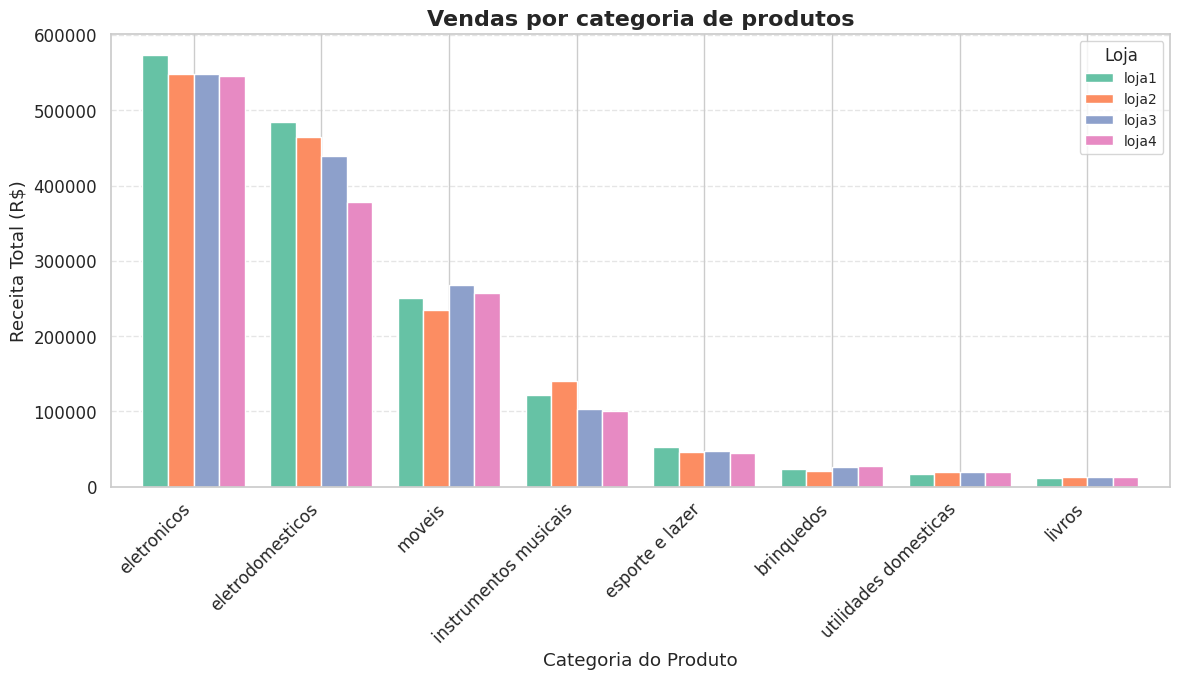

In [34]:
# Grafico de barras representando as vendas por categorias.
sns.set(style='whitegrid', palette='Set2', font_scale=1.1)
categoria_consolidado.plot(kind='bar', figsize=(12, 7), width=0.8)
plt.title('Vendas por categoria de produtos', fontsize=16, weight='bold')
plt.xlabel('Categoria do Produto')
plt.ylabel('Receita Total (R$)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loja', title_fontsize='12', fontsize='10', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [35]:
def media_avaliacao (loja):
  return float(loja['Avaliação da compra'].mean())


In [36]:
media_avaliacao_por_lojas = {'loja1':media_avaliacao(loja1),
                            'loja2':media_avaliacao(loja2),
                            'loja3':media_avaliacao(loja3),
                            'loja4':media_avaliacao(loja4)}
print("--------------------------------")
print("{:<10} | {:>12}".format("Loja", "Média de Avaliação"))
print("--------------------------------")
for loja, media in media_avaliacao_por_lojas.items():
    print("{:<10} | Nota {:>11.2f}".format(loja, media))
print("--------------------------------")

--------------------------------
Loja       | Média de Avaliação
--------------------------------
loja1      | Nota        3.98
loja2      | Nota        4.04
loja3      | Nota        4.05
loja4      | Nota        4.00
--------------------------------


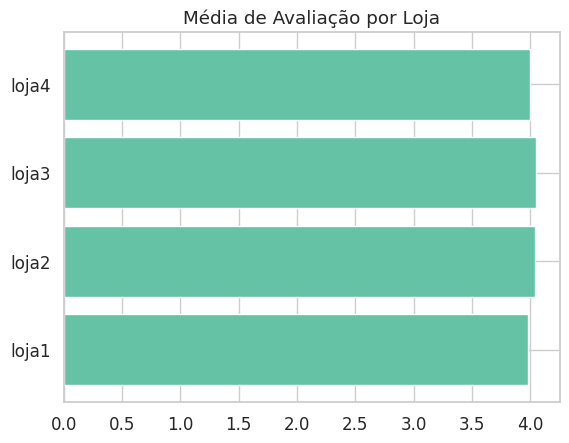

In [37]:
plt.barh(media_avaliacao_por_lojas.keys(), media_avaliacao_por_lojas.values())
plt.title('Média de Avaliação por Loja')
#plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [38]:
Mais_LOJA1 = loja1.groupby('Produto')['Preço'].sum().nlargest(5)
Menos_LOJA1 = loja1.groupby('Produto')['Preço'].sum().nsmallest(5)
Mais_LOJA2 = loja2.groupby('Produto')['Preço'].sum().nlargest(5)
Menos_LOJA2 = loja2.groupby('Produto')['Preço'].sum().nsmallest(5)
Mais_LOJA3 = loja3.groupby('Produto')['Preço'].sum().nlargest(5)
Menos_LOJA3 = loja3.groupby('Produto')['Preço'].sum().nsmallest(5)
Mais_LOJA4 = loja4.groupby('Produto')['Preço'].sum().nlargest(5)
Menos_LOJA4 = loja4.groupby('Produto')['Preço'].sum().nsmallest(5)

In [39]:
def Gra_mais_e_menos_vendido(Mais,Menos,nome_loja):
  plt.figure(figsize=(4, 4))
  plt.barh(Mais.index, Mais.values/100, label='Mais vendidos',color='seagreen')
  plt.barh(Menos.index,Menos.values/10, label='Menos vendidos', color='indianred')
  plt.xlabel('Receita')
  plt.ylabel (nome_loja)
  plt.title('Produtos Mais e Menos Vendidos')
  plt.gca().invert_yaxis()
  plt.show()


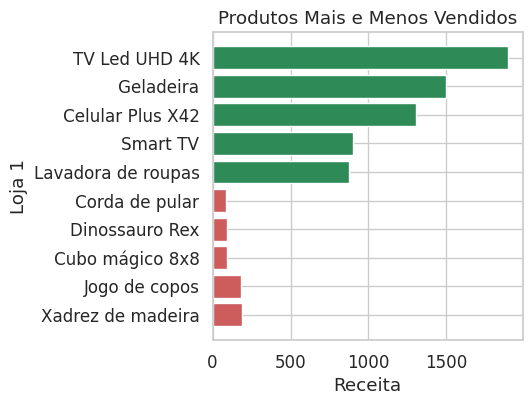

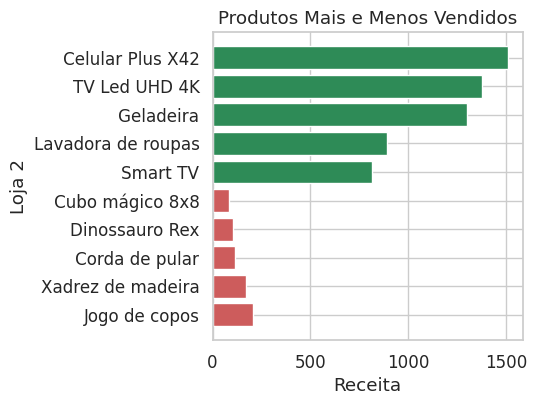

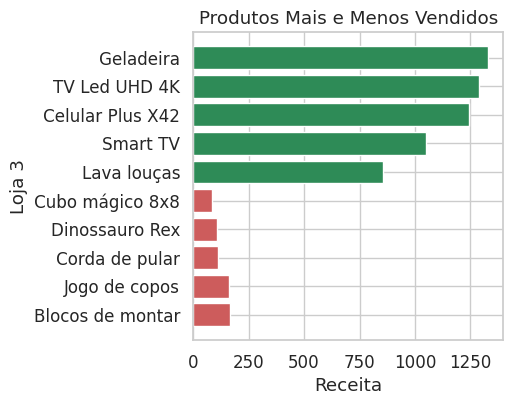

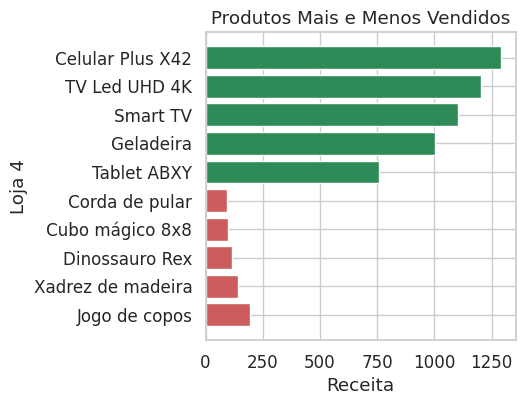

In [40]:
Gra_mais_e_menos_vendido(Mais_LOJA1, Menos_LOJA1, 'Loja 1')
print()
Gra_mais_e_menos_vendido(Mais_LOJA2, Menos_LOJA2, 'Loja 2')
print()
Gra_mais_e_menos_vendido(Mais_LOJA3, Menos_LOJA3, 'Loja 3')
print()
Gra_mais_e_menos_vendido(Mais_LOJA4, Menos_LOJA4, 'Loja 4')


In [41]:
Mais_Menos_loja1=pd.concat([loja1.groupby('Produto')['Preço'].sum().nlargest(5), loja1.groupby('Produto')['Preço'].sum().nsmallest(5)], axis=1)
Mais_Menos_loja1.columns = ['05 Mais vendido Loja 1', '05 Menos vendido Loja 1']
Mais_Menos_loja1


,05 Mais vendido Loja 1,05 Menos vendido Loja 1
Produto,,
TV Led UHD 4K,189534.28,NaN
Geladeira,149524.28,NaN
Celular Plus X42,130536.40,NaN
Smart TV,89936.15,NaN
Lavadora de roupas,87711.30,NaN
Corda de pular,NaN,870.89
Dinossauro Rex,NaN,918.40
Cubo mágico 8x8,NaN,929.27
Jogo de copos,NaN,1812.15


In [42]:
Mais_Menos_loja2=pd.concat([loja2.groupby('Produto')['Preço'].sum().nlargest(5), loja2.groupby('Produto')['Preço'].sum().nsmallest(5)], axis=1)
Mais_Menos_loja2.columns = ['05 Mais vendido Loja 2', '05 Menos vendido Loja 2']
Mais_Menos_loja2

,05 Mais vendido Loja 2,05 Menos vendido Loja 2
Produto,,
Celular Plus X42,150967.83,NaN
TV Led UHD 4K,137833.06,NaN
Geladeira,130176.48,NaN
Lavadora de roupas,89016.81,NaN
Smart TV,81522.94,NaN
Cubo mágico 8x8,NaN,858.22
Dinossauro Rex,NaN,1027.41
Corda de pular,NaN,1142.54
Xadrez de madeira,NaN,1717.05


In [43]:
Mais_Menos_loja3=pd.concat([loja3.groupby('Produto')['Preço'].sum().nlargest(5), loja3.groupby('Produto')['Preço'].sum().nsmallest(5)], axis=1)
Mais_Menos_loja3.columns = ['05 Mais vendido Loja 3', '05 Menos vendido Loja 3']
Mais_Menos_loja3


,05 Mais vendido Loja 3,05 Menos vendido Loja 3
Produto,,
Geladeira,133185.99,NaN
TV Led UHD 4K,128892.11,NaN
Celular Plus X42,124300.84,NaN
Smart TV,105116.46,NaN
Lava louças,85819.73,NaN
Cubo mágico 8x8,NaN,853.81
Dinossauro Rex,NaN,1060.78
Corda de pular,NaN,1137.76
Jogo de copos,NaN,1614.20


In [44]:
Mais_Menos_loja4=pd.concat([loja4.groupby('Produto')['Preço'].sum().nlargest(5), loja4.groupby('Produto')['Preço'].sum().nsmallest(5)], axis=1)
Mais_Menos_loja4.columns = ['05 Mais vendido Loja 4', '05 Menos vendido Loja 4']
Mais_Menos_loja4

,05 Mais vendido Loja 4,05 Menos vendido Loja 4
Produto,,
Celular Plus X42,128930.07,NaN
TV Led UHD 4K,120393.25,NaN
Smart TV,110387.57,NaN
Geladeira,100362.59,NaN
Tablet ABXY,75630.75,NaN
Corda de pular,NaN,939.74
Cubo mágico 8x8,NaN,997.38
Dinossauro Rex,NaN,1143.94
Xadrez de madeira,NaN,1434.09


# 5. Frete Médio por Loja


In [45]:
def frete_medio (loja):
  return float(loja['Frete'].mean())

Frete_medio_por_loja   = {'loja1':frete_medio(loja1),
                          'loja2':frete_medio(loja2),
                          'loja3':frete_medio(loja3),
                          'loja4':frete_medio(loja4)}
Frete_medio_por_loja=pd.DataFrame(Frete_medio_por_loja.items(), columns=['Loja', 'Valor Médio do Frete (R$)'])
Frete_medio_por_loja

,Loja,Valor Médio do Frete (R$)
0,loja1,34.691805
1,loja2,33.621941
2,loja3,33.074464
3,loja4,31.278997


In [46]:
fig = px.bar(Frete_medio_por_loja,
             y='Loja',
             x='Valor Médio do Frete (R$)',
             color='Loja',
             text='Valor Médio do Frete (R$)',
             title='Valor Médio de Frete por Loja',
             labels={'Valor Médio do Frete (R$)': 'Frete (R$)'},
             color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_traces(texttemplate='R$ %{text:.2f}', textposition='outside')

fig.update_traces(
    texttemplate='R$ %{x:.2f}',
    textposition='inside',
    insidetextanchor='start')

fig.update_layout(
    xaxis_range=[0, max(Frete_medio_por_loja['Valor Médio do Frete (R$)']) + 5],
    yaxis=dict(title='', tickfont=dict(size=13)),
    xaxis=dict(title='Valor do Frete (R$)', tickfont=dict(size=12)),
    showlegend=False,
    height=400,
    plot_bgcolor='white')

fig.show()

# **Analise de desempenho Geografico**

In [47]:
coordenadas_loja1= loja1.groupby(['lat', 'lon']).size().sort_values(ascending=False).rename('Quantidade').reset_index()
coordenadas_loja2= loja2.groupby(['lat', 'lon']).size().sort_values(ascending=False).rename('Quantidade').reset_index()
coordenadas_loja3= loja3.groupby(['lat', 'lon']).size().sort_values(ascending=False).rename('Quantidade').reset_index()
coordenadas_loja4= loja4.groupby(['lat', 'lon']).size().sort_values(ascending=False).rename('Quantidade').reset_index()

In [48]:
grafico_debug = px.scatter_mapbox(coordenadas_loja1, lat='lat', lon='lon', size='Quantidade',
                                  hover_name='Quantidade', zoom=3, size_max=80,
                                  mapbox_style='open-street-map',title='Distribuição Geográfica por Quantidade de Vendas loja " 1"')
grafico_debug.show()

grafico_debug = px.scatter_mapbox(coordenadas_loja2, lat='lat', lon='lon', size='Quantidade',
                                  hover_name='Quantidade', zoom=3, size_max=50,
                                  mapbox_style='open-street-map',title='Distribuição Geográfica por Quantidade de Vendas loja "2"')
grafico_debug.show()
grafico_debug = px.scatter_mapbox(coordenadas_loja3, lat='lat', lon='lon', size='Quantidade',
                                  hover_name='Quantidade', zoom=3, size_max=50,
                                  mapbox_style='open-street-map',title='Distribuição Geográfica por Quantidade de Vendas loja "3"')
grafico_debug.show()
grafico_debug = px.scatter_mapbox(coordenadas_loja4, lat='lat', lon='lon', size='Quantidade',
                                  hover_name='Quantidade', zoom=3, size_max=50,
                                  mapbox_style='open-street-map',title='Distribuição Geográfica por Quantidade de Vendas loja "4"')
grafico_debug.show()

###        # Assunto: Análise Detalhada das Lojas para Decisão de Venda

Este relatório tem como objetivo consolidar todas as informações levantadas sobre suas quatro lojas para auxiliá-lo na importante decisão de qual unidade desativar. Analisamos o faturamento total, as vendas por categoria, a média de avaliação dos clientes e os itens mais e menos vendidos em cada loja.


**Análise de Faturamento :** A LOJA 01 lidera em faturamento total, seguida de perto pela LOJA 02 e LOJA 03. A LOJA 04 apresenta o menor faturamento entre as quatro unidades.

** Vendas por Categoria:** Com base no faturamento e nas vendas por categoria, a LOJA 04 demonstra um desempenho financeiro inferior e uma menor capacidade de gerar receita em comparação com as demais.

**Média de Avaliação das Lojas:**	 A LOJA 03 possui a maior média de avaliação, indicando alta satisfação dos clientes. A LOJA 02 também apresenta uma avaliação positiva. A LOJA 01, apesar do maior faturamento, tem a menor média de avaliação, sugerindo possíveis áreas de insatisfação. A LOJA 04 possui uma avaliação competitiva, mas não o suficiente para compensar seu baixo faturamento.

**Análise dos Itens Mais e Menos Vendidos:**  As LOJAS 01, 02 e 03 compartilham uma forte demanda por eletrônicos e eletrodomésticos entre seus itens mais vendidos. As listas de itens menos vendidos indicam produtos com menor saída em todas as lojas.

                          **Conclusão Geral: **



A LOJA 04 candidata mais provável para ser desativada. Os motivos principais, agora com a consideração do frete, são:
•	Menor Faturamento Total: Mantém-se como o principal fator de desempenho inferior.
•	Desempenho Inferior por Categoria: A loja não demonstra força em nenhuma área específica.
•	Custo de Frete Baixo, mas Insuficiente para Compensar: Embora o frete médio seja o menor, o baixo volume de vendas significa que a economia total em custos de envio não é significativa o suficiente para torná-la mais atraente financeiramente.
•	Média de Avaliação Mediana: A avaliação não é baixa, mas também não é um diferencial que justifique a manutenção de uma loja com baixo faturamento.
